In [2]:
#--------------------------------------------------------------------------------
#--                                                                            --
#--               Federal University of Santa Catarina UFSC                    --
#--                                Brazil                                      --
#--                                                                            --
#--------------------------------------------------------------------------------
#--                                                                            --
#-- File        : Atividade_6.py                                               --
#-- Authors     : Luis Felipe de Deus
#--             : Guilberth Matos 
#--             : Jéferson Cansi Pedroso                                       --
#--                                                                            -- 
#--------------------------------------------------------------------------------
#--                                                                            --
#-- Created     : 23 July 2021                                                  --
#-- Update      : 29 July 2021                                                  --
#--------------------------------------------------------------------------------

### This analysis was created with:
#### First a  a brief tutorial well explained and detailed 
#### Second at the bottom of the notebook there is a benchmark using a built-in class  to create dynamic experiments and at last, collect the results.

## 0. Import the libs which we need

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import os
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

## 1. Read data

In [4]:
#This is the root folder
dataset_folder = 'Data/'

In [5]:
# Features extracted from EEG signal 
features_0 = pd.read_csv(dataset_folder+'feat0.csv')
features_0 = features_0.drop(['Unnamed: 0'],axis=1)
features_0.head()

,f1,f2,f3,f4,class
0,0.887621,0.185875,0.581396,0.441199,1.0
1,0.783744,0.163794,0.588340,0.530562,1.0
2,0.875873,0.154714,0.589802,0.507822,1.0
3,0.881293,0.138396,0.592911,0.408390,1.0
4,0.798116,0.125291,0.595338,0.495968,1.0


In [6]:
# Features extracted from EEG signal 
features_1 = pd.read_csv(dataset_folder+'feat1.csv')
features_1 = features_1.drop(['Unnamed: 0'],axis=1)
features_1.head()

,f1,f2,f3,f4,class
0,0.982030,0.245985,0.575897,0.426920,1.0
1,1.153692,0.104485,0.595041,0.461180,1.0
2,0.888386,0.108443,0.598907,0.279440,1.0
3,0.731298,0.147613,0.586604,0.406210,1.0
4,0.753977,0.147066,0.593192,0.376106,1.0


### 1.1 Understand dataset

In [7]:
print(features_0['class'].value_counts())

-1.0    100
 0.0    100
 1.0    100
Name: class, dtype: int64


In [8]:
print(features_1['class'].value_counts())

-1.0    100
 0.0    100
 1.0    100
Name: class, dtype: int64


## 2. Machine Learning Models

### 2.1 Get features

In [9]:
#fts is a list with just the features names
fts = list(features_0.columns)
fts.remove( 'class' )

### 2.2 Split between features and label

In [10]:
#X contains the feature data frame, while y is an array with the target
X = features_0[fts]
y = features_0['class']

### 2.3 Split between train and test

In [21]:
#Now we should split the dataset between train and test
#We're going to use 2/3 to train the model and 1/3 of the data to test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 2.4 Remove Nan or Inf values

In [22]:
#If so, filter out the corrupted rows
X_train = X_train.replace(np.nan, 0)
X_test = X_test.replace(np.nan, 0)

### 2.5 Create and fit classifiers

In [12]:
#Lets create our ECG classifier
#Using KNN with 3 neighbors
EEG_clf = KNeighborsClassifier(n_neighbors=3)
#Using Gaussian Naive Bayes
#EEG_clf = GaussianNB()
EEG_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1]:
#Import the libraries which we need
#from keras.engine import Input, Model
from keras.layers import Dropout, Dense, BatchNormalization
#from keras.layers.merge import add
#from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
#from keras.optimizers import SGD 
#from keras.callbacks import LearningRateScheduler
from keras.models import model_from_json
import keras

In [29]:
N_OUTPUT = 3

input_shape = X_train.shape[1:]

inputs = keras.Input(shape=input_shape)
x = Dense(512, activation="relu")(inputs)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
x = BatchNormalization()(x)

x = Dropout(0.25)(x)
outputs = Dense(N_OUTPUT, activation="softmax")(x)

EEG_model = keras.Model(inputs=inputs, outputs=outputs, name="EEG_model")
EEG_model.summary()

Model: "EEG_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               2560      
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                82

In [30]:
# One-hot encoding of labels
y_train_oh = tf.keras.utils.to_categorical(y_train, 3)

In [31]:
METRICS = [
          keras.metrics.TruePositives(name='tp'),
          keras.metrics.FalsePositives(name='fp'),
          keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
        ]

In [32]:
#Compile Neural Network
EEG_model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        #optimizer='adagrad',
        #optimizer=sgd,
         loss="categorical_crossentropy",
         metrics=METRICS,
        )

In [33]:
%%time
EPOCHS = 100


h = EEG_model.fit(X_train, y_train_oh,
        #validation_data = (X_Out_norm, pd.to_numeric(y_Out)),
        batch_size=32,
        epochs=EPOCHS
)


Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1016 - recall: 0.5174 - fp: 71.0000 - fn: 97.0000 - tn: 331.0000 - precision: 0.5943 - accuracy: 0.7214 - auc: 0.7433 - tp: 104.0000
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6146 - recall: 0.7413 - fp: 39.0000 - fn: 52.0000 - tn: 363.0000 - precision: 0.7926 - accuracy: 0.8491 - auc: 0.9059 - tp: 149.0000
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6398 - recall: 0.7264 - fp: 43.0000 - fn: 55.0000 - tn: 359.0000 - precision: 0.7725 - accuracy: 0.8375 - auc: 0.9009 - tp: 146.0000
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5285 - recall: 0.7562 - fp: 36.0000 - fn: 49.0000 - tn: 366.0000 - precision: 0.8085 - accuracy: 0.8590 - auc: 0.9265 - tp: 152.0000
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5538 - recall: 0.7612 - fp: 36.0000 - fn: 48.0000 - tn: 366.0000 - precision: 0.8095 - accuracy: 0.8607

7/7 [==============================] - 0s 2ms/step - loss: 0.3055 - recall: 0.8706 - fp: 22.0000 - fn: 26.0000 - tn: 380.0000 - precision: 0.8883 - accuracy: 0.9204 - auc: 0.9734 - tp: 175.0000
Epoch 80/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3308 - recall: 0.8607 - fp: 26.0000 - fn: 28.0000 - tn: 376.0000 - precision: 0.8693 - accuracy: 0.9104 - auc: 0.9695 - tp: 173.0000
Epoch 81/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2818 - recall: 0.8806 - fp: 19.0000 - fn: 24.0000 - tn: 383.0000 - precision: 0.9031 - accuracy: 0.9287 - auc: 0.9777 - tp: 177.0000
Epoch 82/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3110 - recall: 0.8657 - fp: 20.0000 - fn: 27.0000 - tn: 382.0000 - precision: 0.8969 - accuracy: 0.9221 - auc: 0.9740 - tp: 174.0000
Epoch 83/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3025 - recall: 0.8856 - fp: 18.0000 - fn: 23.0000 - tn: 384.0000 - precision: 0.9082 - accuracy: 0.9320 - auc: 

<IPython.core.display.Javascript object>


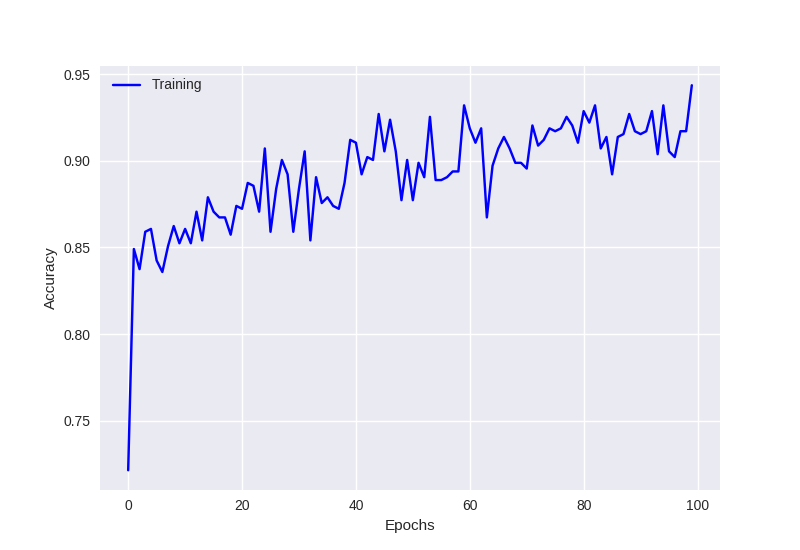

In [34]:
%matplotlib notebook
#Plot learning curve - Accuracy
plt.plot(h.history['accuracy'],  color='blue', label='Training')
#plt.plot(h.history['loss'],  color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#Evaluate with test data
preds = EEG_model.predict(X_test, batch_size=32)

In [38]:
preds

array([[3.79290077e-06, 4.43222149e-07, 9.99995708e-01],
       [2.85901897e-05, 4.49862091e-06, 9.99966860e-01],
       [4.39877447e-04, 1.14446651e-04, 9.99445617e-01],
       [5.44797746e-04, 9.82061848e-02, 9.01249051e-01],
       [1.66998161e-05, 2.69124530e-06, 9.99980569e-01],
       [1.73587596e-05, 4.59145258e-06, 9.99978065e-01],
       [1.83455704e-03, 7.31263135e-05, 9.98092353e-01],
       [1.20864737e-04, 7.58064743e-06, 9.99871492e-01],
       [2.61352793e-03, 5.14321681e-03, 9.92243230e-01],
       [3.15629091e-04, 6.10000607e-05, 9.99623299e-01],
       [1.66707378e-05, 6.95492008e-06, 9.99976397e-01],
       [2.96125014e-04, 3.93692782e-04, 9.99310136e-01],
       [1.43673788e-05, 2.22730046e-06, 9.99983430e-01],
       [2.39089000e-04, 1.26999738e-02, 9.87060905e-01],
       [2.77062156e-03, 8.97428486e-04, 9.96331990e-01],
       [6.67512450e-06, 8.09819198e-07, 9.99992490e-01],
       [3.22088134e-04, 9.80941841e-05, 9.99579847e-01],
       [5.62108926e-06, 6.40737

In [39]:
# One-hot encoding of labels
y_test_oh = tf.keras.utils.to_categorical(y_test, 3)

In [40]:
#Evaluate with the test data
results_NN = EEG_model.evaluate(X_test, y_test_oh, batch_size=32)

4/4 [==============================] - 0s 2ms/step - loss: 4.8072 - recall: 0.2929 - fp: 70.0000 - fn: 70.0000 - tn: 128.0000 - precision: 0.2929 - accuracy: 0.5286 - auc: 0.5270 - tp: 29.0000


In [37]:
results_NN

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
print(' --- Results ----')
TP = results_NN[1]
FP = results_NN[2]
TN = results_NN[3]
FN = results_NN[4]
print('Loss: %.3f' %(results_NN[0]))
print('TP: %d' %(results_NN[1]))
print('FP: %d' %(results_NN[2]))
print('TN: %d' %(results_NN[3]))
print('FN: %d' %(results_NN[4]))
print('Accuracy: %.3f' %(results_NN[5]))
print('Precision: %.3f' %(results_NN[6]))
print('Recall: %.3f' %(results_NN[7]))

### 2.6 Run Predictions

In [13]:
y_test_preds = EEG_clf.predict(X_test) #Create the predictions based on the test set
y_true = np.asarray(y_test) #Store the ground truth value

### 2.7 Evaluation - Overall

In [14]:

hit = 0 #Store the number of hits 
miss = 0 #Store the number of misses 

#Walk through all predictions
for i in range(0, y_test_preds.shape[0]):
    pred = y_test_preds[i] #Get current prediction
    gt = y_true[i] #Get current GT
        
    #If prediction is the same as the real value, then we've got a hit
    #Otherwise it will be a miss
    if(pred == gt):
        hit+=1
    else:
        miss+=1
    
#Furthermore, print some information
print("Number of tests: %d"%(y_test_preds.shape[0]) )
print("Number of Hits: ",hit)
print("Number of Misses: ",miss)
#Use the metrics lib to calculate the statistical analysis
acc = metrics.accuracy_score(y_true, y_test_preds)*100
prec = metrics.precision_score(y_true, y_test_preds, average='macro')*100
recall = metrics.recall_score(y_true, y_test_preds, average='macro')*100
f1_score = metrics.f1_score(y_true, y_test_preds, average='micro')*100
print("\n>> Accuracy  : %.2f %%"%(round(acc,2)))
print(">> Precision : %.2f %%"%(round(prec,2)))
print(">> Recall    : %.2f %%"%(round(recall,2)))
print(">> F1 Score  : %.2f %%"%(round(f1_score,2)))


Number of tests: 99
Number of Hits:  83
Number of Misses:  16

>> Accuracy  : 83.84 %
>> Precision : 84.18 %
>> Recall    : 84.05 %
>> F1 Score  : 83.84 %


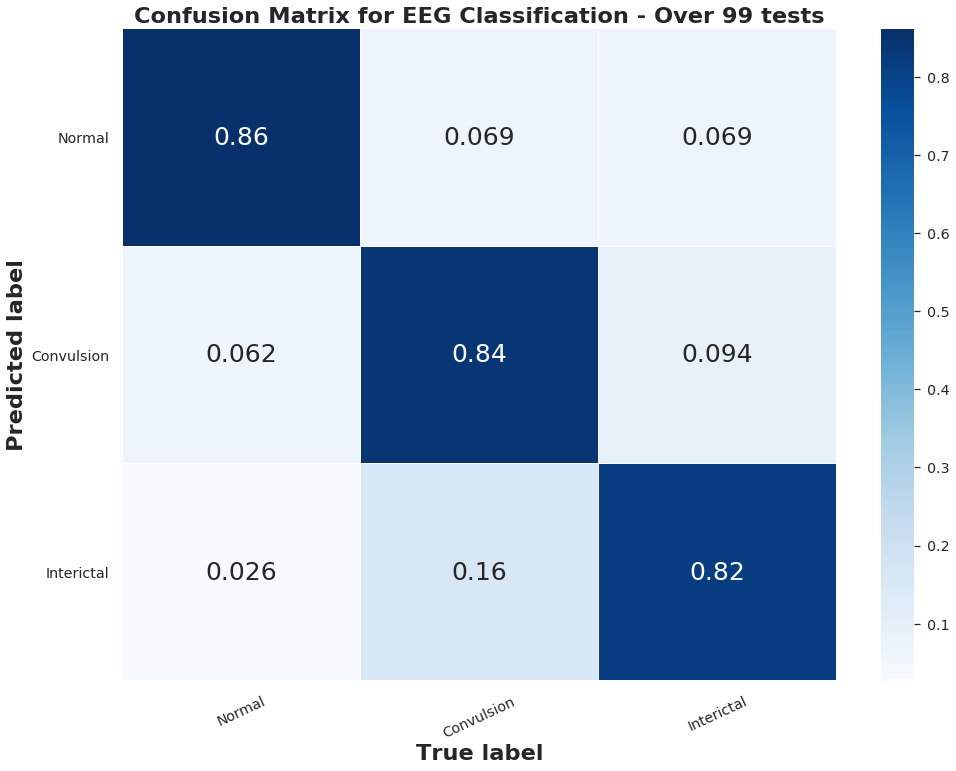

In [15]:

#Get and reshape the confusion matrix data
matrix = confusion_matrix(y_true, y_test_preds)*100
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=[16, 12])
sns.set(font_scale=1.3)
sns.heatmap(matrix, annot=True, annot_kws={'size':25},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Convulsion','Interictal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2,class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.ylabel('Predicted label',fontsize = 'x-large',fontweight = 'bold')
plt.xlabel('True label',fontsize = 'x-large',fontweight = 'bold')

title = 'Confusion Matrix for EEG Classification - Over {:2,d}'.format(len(y_true)) + ' tests'
plt.title(title,fontsize = 'x-large', fontweight = 'bold')
plt.show()

## Benchmark

In [16]:
'''
@brief: This class creates a full ML experiment, it splits the data, create the model and run the analysis
@param: data -> In case of single dataset you should send a data frame in this arg.
@param: label -> string which represents the target class in the data
@param: train -> In case you'd like to send pre-splitted data, here you can send the training data
@param: test -> In case you'd like to send pre-splitted data, here you can send the test data
'''
class ML_Analysis:
    def __init__(self, data, label, train=[], test=[]):
        self.dataset = data
        self.label = label

        self.features = []
        
        self.train_set = train
        self.test_set = test
        
    def create_train_test(self):
        #X contains the feature data frame, while y is an array with the target
        X = self.dataset[self.features]
        y = self.dataset[self.label]
        
        return X, y
    
    def split_data(self, test_size=0.33):
        X,y = self.create_train_test()
        #Now we should split the dataset between train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        #If so, filter out the corrupted rows
        X_train = X_train.replace(np.nan, 0)
        X_test = X_test.replace(np.nan, 0)
        
        return X_train, X_test, y_train, y_test
    
        
    def create_model(self, model, X_train, y_train):
        #Lets create our ECG classifier
        if(model == 'KNN'):
            #Using KNN with 3 neighbors
            self.EEG_clf = KNeighborsClassifier(n_neighbors=3)
        elif(model == 'GNB'):
            #Using Gaussian Naive Bayes
            self.EEG_clf = GaussianNB()
            
        self.EEG_clf.fit(X_train, y_train)
        
    def predict(self, X_test):
        y_test_preds = self.EEG_clf.predict(X_test) #Create the predictions based on the test set
        return y_test_preds
        
    def run_evaluation(self, X_test, y_test):
        
        y_test_preds = self.predict(X_test)
        y_true = np.asarray(y_test)
        hit = 0 #Store the number of hits 
        miss = 0 #Store the number of misses 

        #Walk through all predictions
        for i in range(0, y_test_preds.shape[0]):
            pred = y_test_preds[i] #Get current prediction
            gt = y_true[i] #Get current GT

            #If prediction is the same as the real value, then we've got a hit
            #Otherwise it will be a miss
            if(pred == gt):
                hit+=1
            else:
                miss+=1

        #Furthermore, print some information
        print("Number of tests: %d"%(y_test_preds.shape[0]) )
        print("Number of Hits: ",hit)
        print("Number of Misses: ",miss)
        #Use the metrics lib to calculate the statistical analysis
        acc = metrics.accuracy_score(y_true, y_test_preds)*100
        prec = metrics.precision_score(y_true, y_test_preds, average='macro')*100
        recall = metrics.recall_score(y_true, y_test_preds, average='macro')*100
        f1_score = metrics.f1_score(y_true, y_test_preds, average='micro')*100
        
        
        acc = round(acc,2)
        prec = round(prec,2)
        recall = round(recall,2)
        fe_score = round(f1_score,2)
        
        print("\n>> Accuracy  : %.2f %%"%(acc))
        print(">> Precision : %.2f %%"%(prec))
        print(">> Recall    : %.2f %%"%(recall))
        print(">> F1 Score  : %.2f %%"%(f1_score))
        
        #Get and reshape the confusion matrix data
        matrix = confusion_matrix(y_true, y_test_preds)*100
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
        
    
        return {'accuracy':acc, 'precision':prec, 'recall':recall, 'f1':f1_score, 'matrix':matrix, 'n_tests': len(y_true)}


    def deploy(self,model):
        if(len(self.train_set) != 0 ):
            print("Using pre defined Train and Test sets")
            self.features = list(self.train_set.columns)
            self.features.remove(self.label)
            X_train = self.train_set[self.features]
            y_train = self.train_set[self.label]
            
            X_test = self.test_set[self.features]
            y_test = self.test_set[self.label]
            
            #If so, filter out the corrupted rows
            X_train = X_train.replace(np.nan, 0)
            X_test = X_test.replace(np.nan, 0)
        else:
            self.features = list(self.dataset.columns)
            self.features.remove(self.label)
            #First split the data between train and test
            X_train, X_test, y_train, y_test = self.split_data()
            
        #Second create the model
        self.create_model(model, X_train, y_train)
        #Third evaluation
        results = self.run_evaluation( X_test, y_test)
        
        return results

        
        

In [17]:
'''
@brief: This function plots the confusion matrix for the experiment
'''
def plot_cm(matrix,n_tests,label):
        # Build the plot
        plt.figure(figsize=[16, 12])
        sns.set(font_scale=1.3)
        sns.heatmap(matrix, annot=True, annot_kws={'size':25},
                    cmap=plt.cm.Blues, linewidths=0.2)

        # Add labels to the plot
        class_names = ['Normal','Convulsion','Interictal']
        tick_marks = np.arange(len(class_names))
        tick_marks2 = tick_marks + 0.5
        plt.xticks(tick_marks2,class_names, rotation=25)
        plt.yticks(tick_marks2, class_names, rotation=0)
        plt.ylabel('Predicted label',fontsize = 'x-large',fontweight = 'bold')
        plt.xlabel('True label',fontsize = 'x-large',fontweight = 'bold')

        title = label+' - Confusion Matrix for EEG Classification - Over {:2,d}'.format(n_tests) + ' tests'
        plt.title(title,fontsize = 'x-large', fontweight = 'bold')
        
    

### 1.0 Using Feat0.csv - KNN

In [18]:
mla = ML_Analysis(features_0, 'class')
results = mla.deploy('KNN')

Number of tests: 99
Number of Hits:  83
Number of Misses:  16

>> Accuracy  : 83.84 %
>> Precision : 84.18 %
>> Recall    : 84.05 %
>> F1 Score  : 83.84 %


In [19]:
results

{'accuracy': 83.84,
 'f1': 83.83838383838383,
 'matrix': array([[0.86206897, 0.06896552, 0.06896552],
        [0.0625    , 0.84375   , 0.09375   ],
        [0.02631579, 0.15789474, 0.81578947]]),
 'n_tests': 99,
 'precision': 84.18,
 'recall': 84.05}

<IPython.core.display.Javascript object>


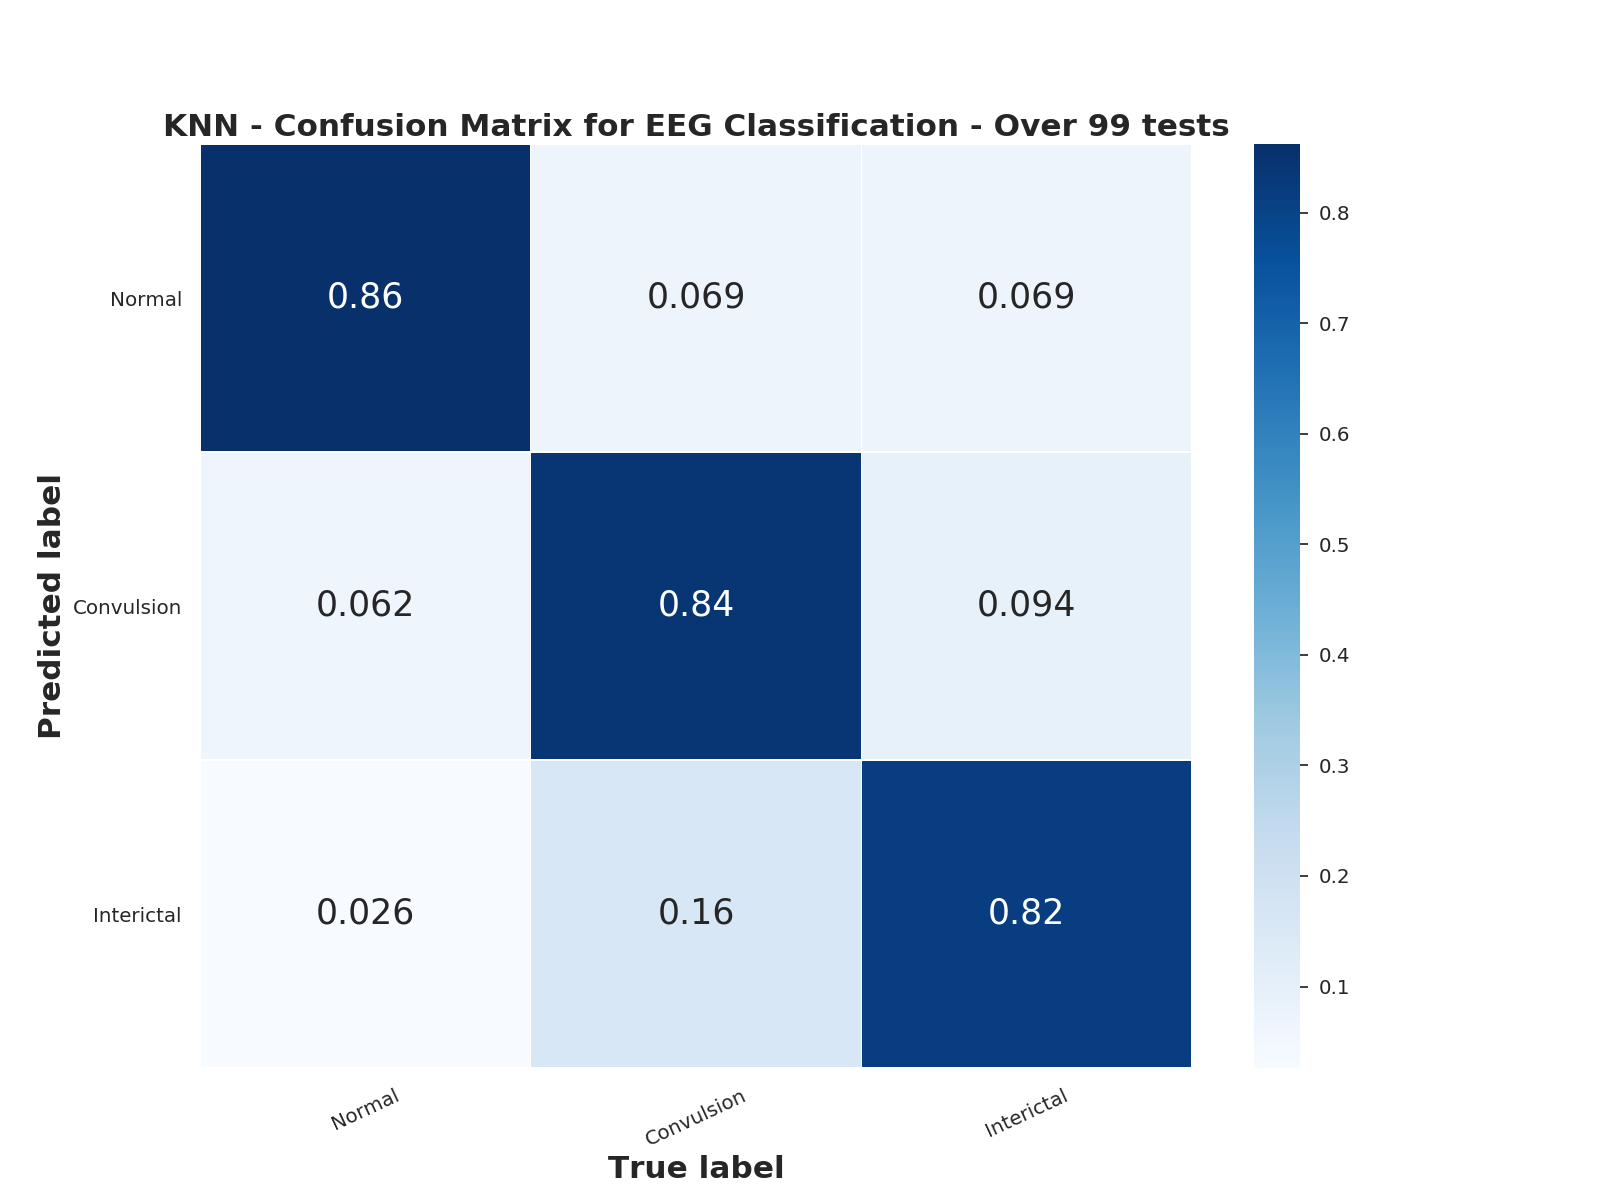

In [20]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'KNN')

### 1.1 Using Feat0.csv - Naive Bayes

In [21]:
mla = ML_Analysis(features_0, 'class')
results = mla.deploy('GNB')

Number of tests: 99
Number of Hits:  75
Number of Misses:  24

>> Accuracy  : 75.76 %
>> Precision : 75.76 %
>> Recall    : 76.27 %
>> F1 Score  : 75.76 %


<IPython.core.display.Javascript object>


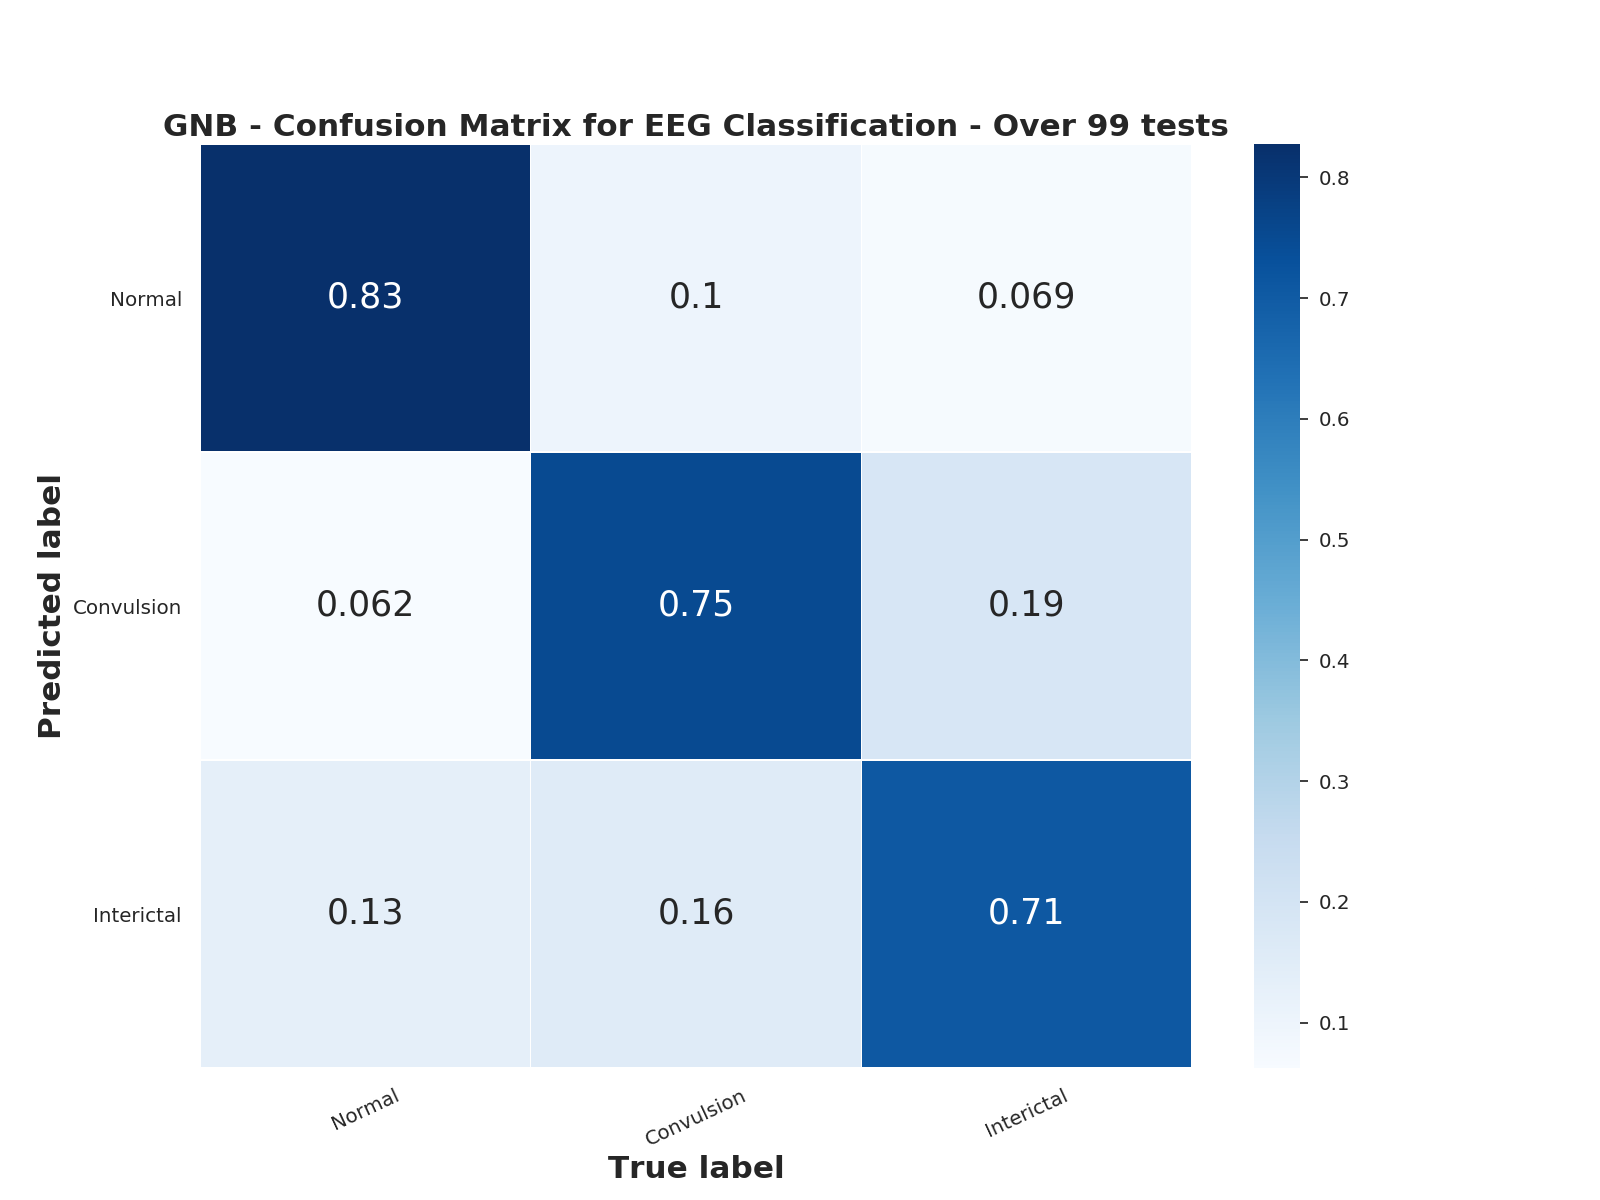

In [22]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'GNB')

### 2.0 Using Feat1.csv - KNN

In [23]:
mla = ML_Analysis(features_1, 'class')
results = mla.deploy('KNN')

Number of tests: 99
Number of Hits:  81
Number of Misses:  18

>> Accuracy  : 81.82 %
>> Precision : 82.34 %
>> Recall    : 83.34 %
>> F1 Score  : 81.82 %


<IPython.core.display.Javascript object>


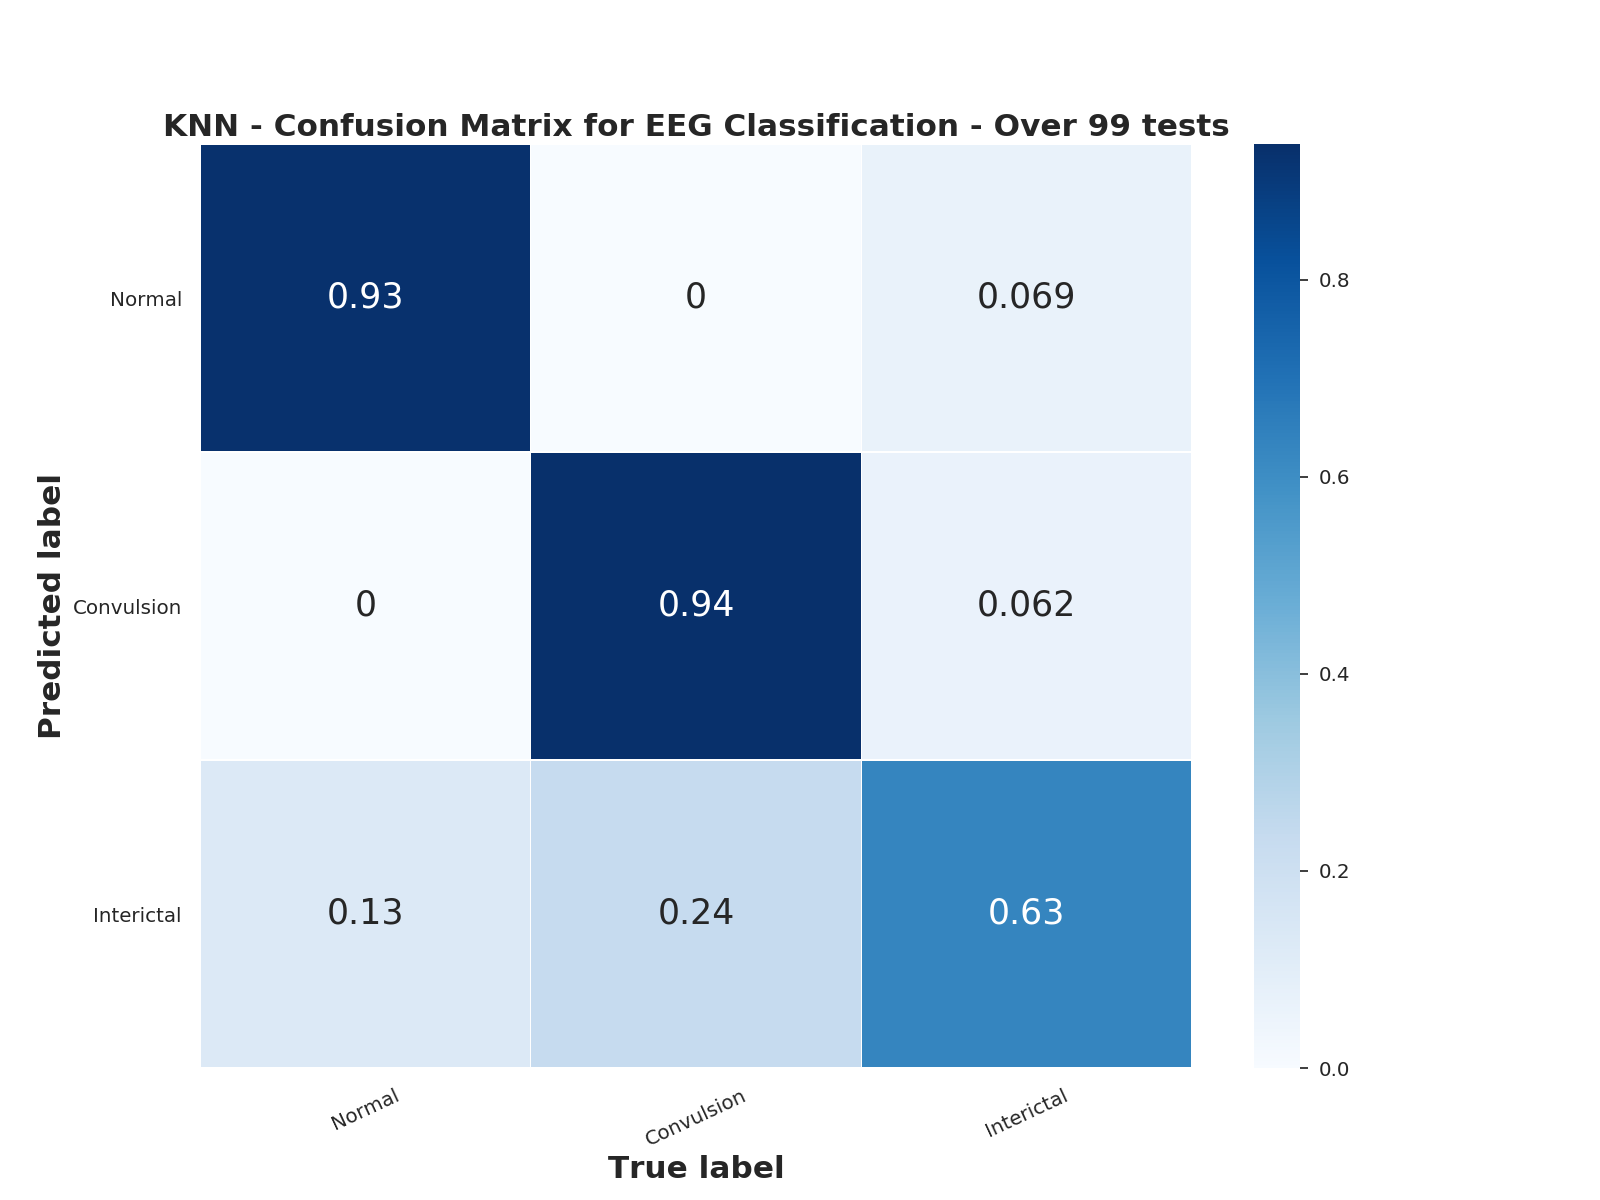

In [24]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'KNN')

### 2.1 Using Feat1.csv - Naive Bayes

In [25]:
mla = ML_Analysis(features_1, 'class')
results = mla.deploy('GNB')

Number of tests: 99
Number of Hits:  76
Number of Misses:  23

>> Accuracy  : 76.77 %
>> Precision : 79.02 %
>> Recall    : 78.30 %
>> F1 Score  : 76.77 %


<IPython.core.display.Javascript object>


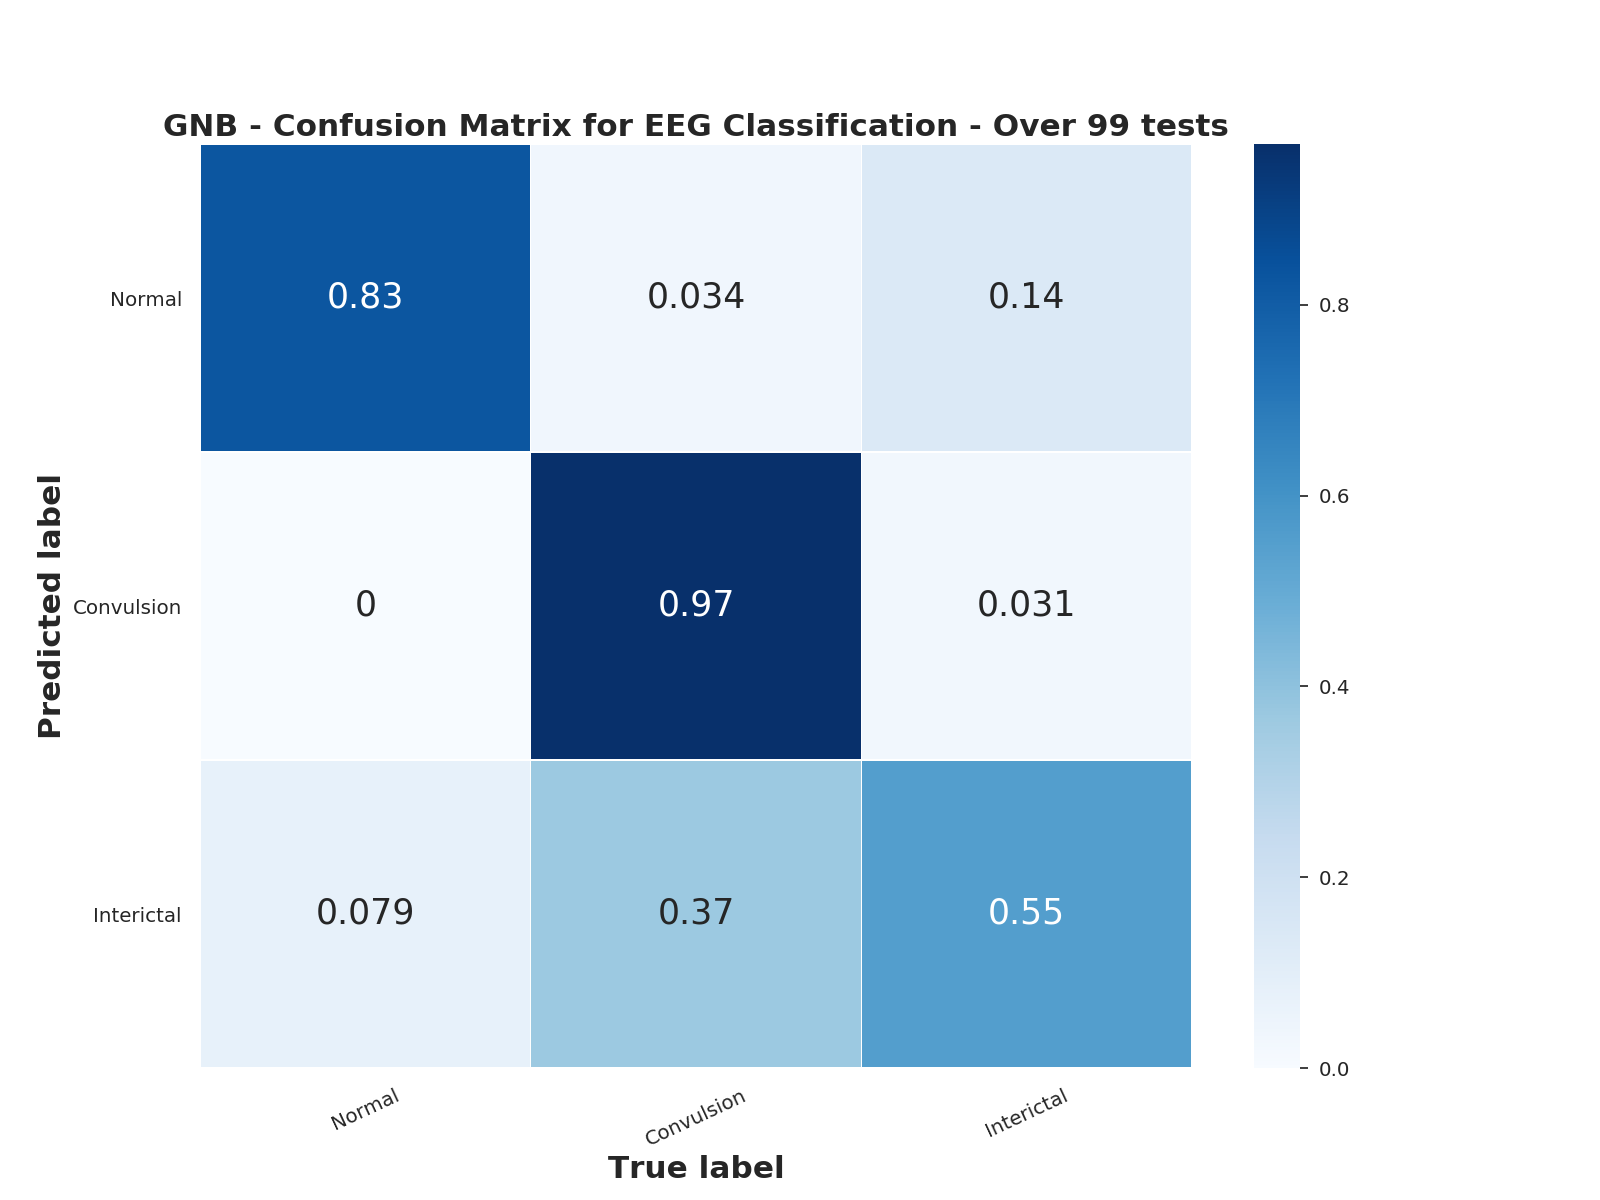

In [26]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'GNB')

### 3.0 Using both feat0 train / feat1 test - KNN

In [27]:
mla = ML_Analysis(None, 'class', features_0, features_1)
results = mla.deploy('KNN')

Using pre defined Train and Test sets
Number of tests: 300
Number of Hits:  173
Number of Misses:  127

>> Accuracy  : 57.67 %
>> Precision : 54.57 %
>> Recall    : 57.67 %
>> F1 Score  : 57.67 %


<IPython.core.display.Javascript object>


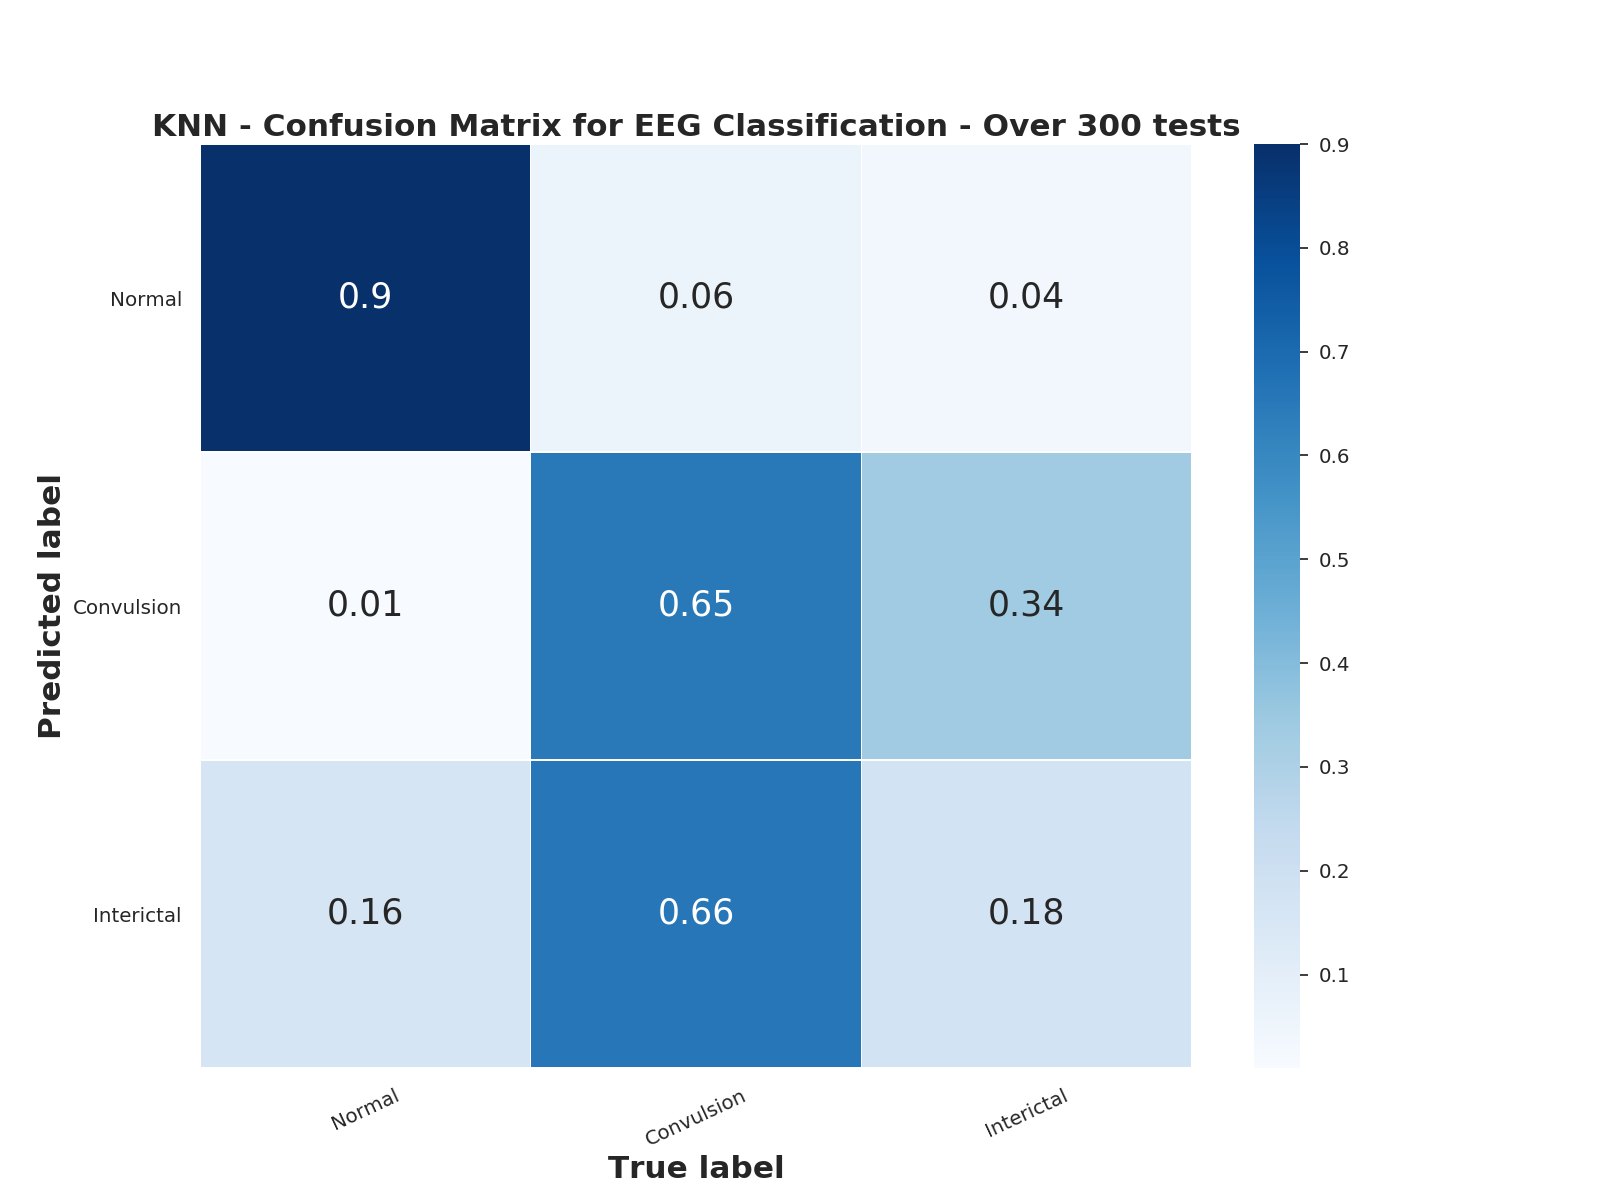

In [28]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'KNN')

### 3.1 using both feat0 train / feat1 test - Naive Bayes

In [29]:
mla = ML_Analysis(None, 'class', features_0, features_1)
results = mla.deploy('GNB')

Using pre defined Train and Test sets
Number of tests: 300
Number of Hits:  196
Number of Misses:  104

>> Accuracy  : 65.33 %
>> Precision : 65.55 %
>> Recall    : 65.33 %
>> F1 Score  : 65.33 %


<IPython.core.display.Javascript object>


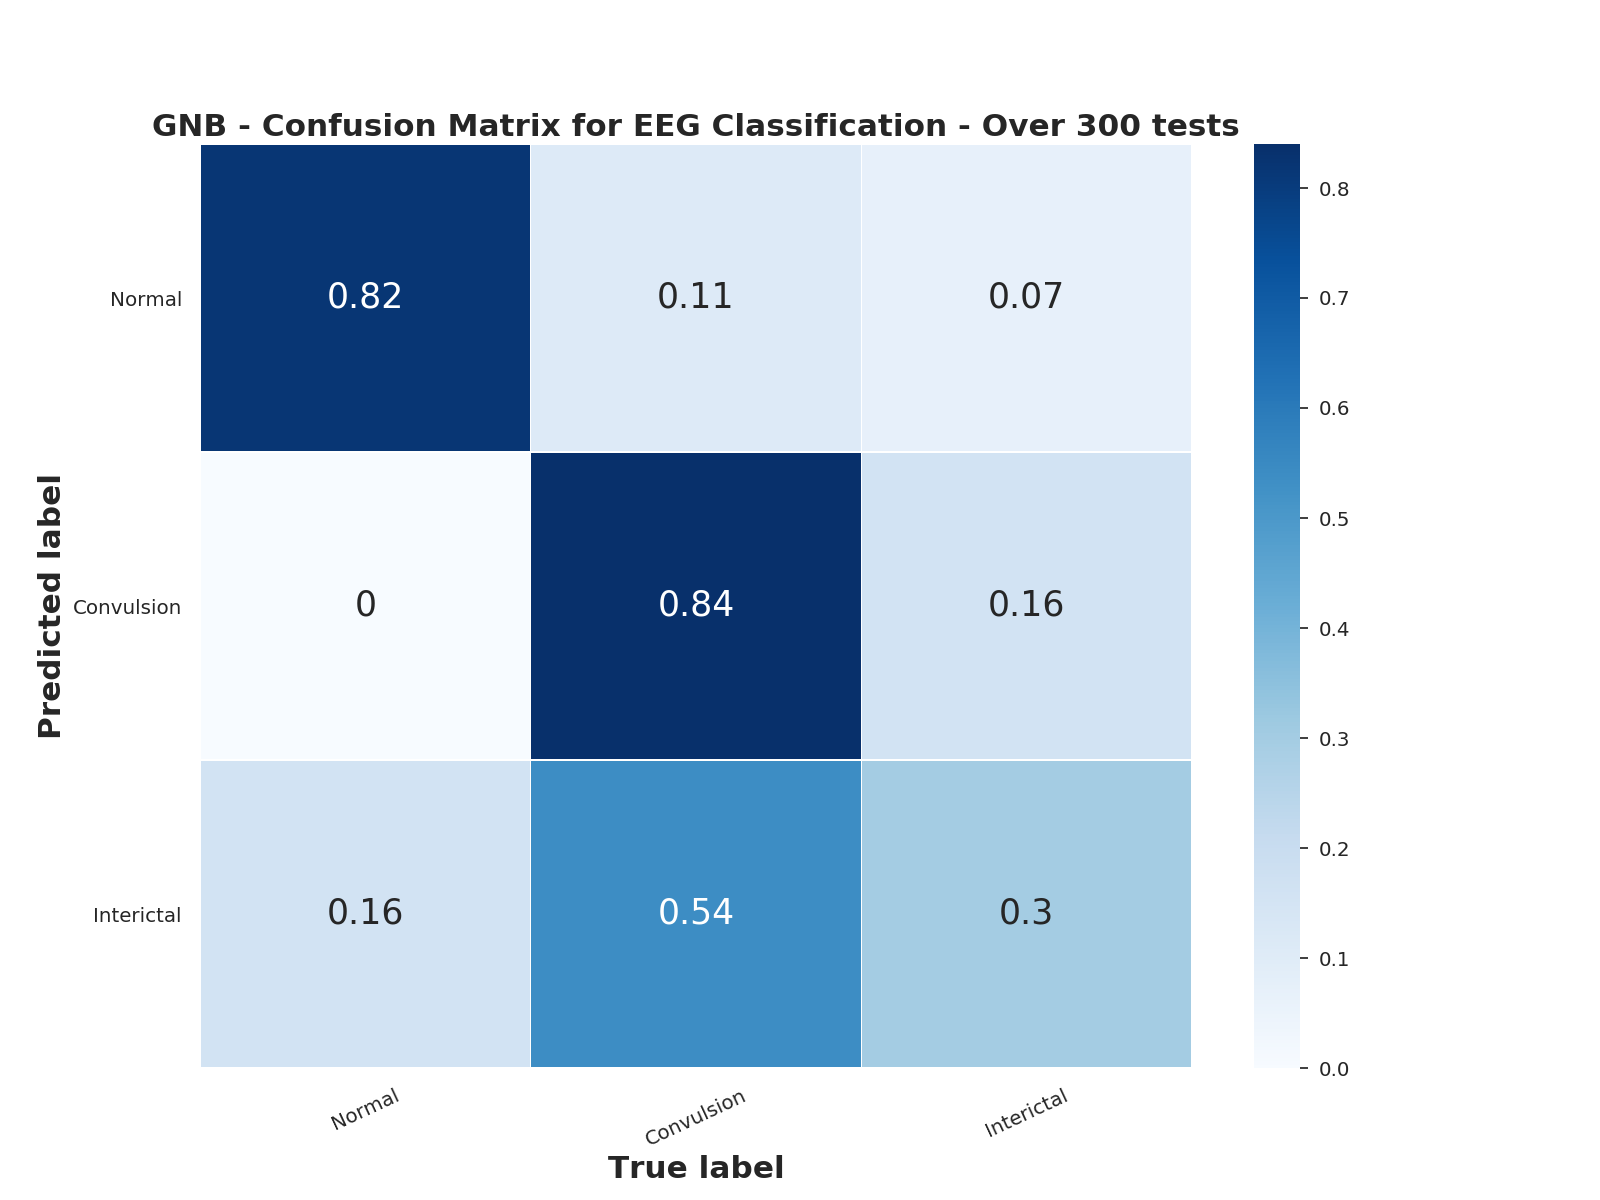

In [30]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'GNB')

### 3.2 Using both feat1 train / feat0 test - KNN

In [31]:
mla = ML_Analysis(None, 'class', features_1, features_0)
results = mla.deploy('KNN')

Using pre defined Train and Test sets
Number of tests: 300
Number of Hits:  155
Number of Misses:  145

>> Accuracy  : 51.67 %
>> Precision : 47.60 %
>> Recall    : 51.67 %
>> F1 Score  : 51.67 %


<IPython.core.display.Javascript object>


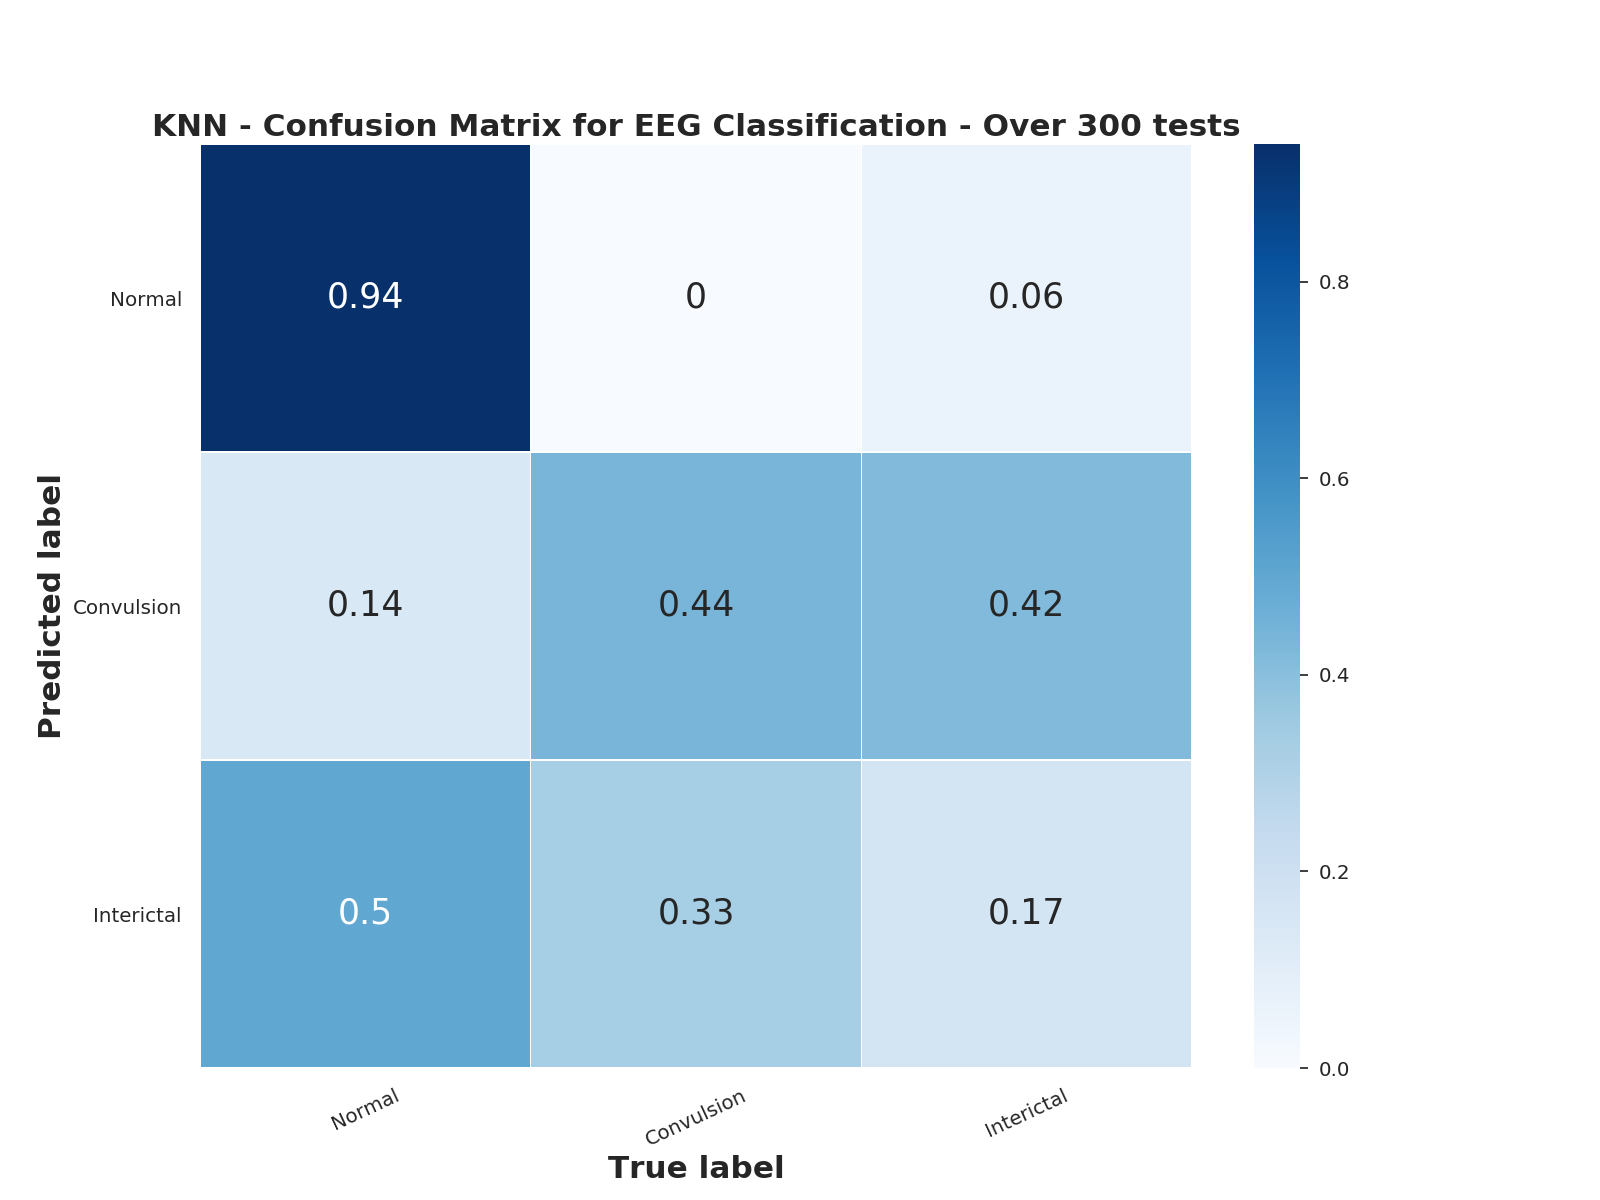

In [32]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'KNN')

### 2.3 Using both feat1 train / feat0 test - Naive Bayes

In [33]:
mla = ML_Analysis(None, 'class', features_1, features_0)
results = mla.deploy('GNB')

Using pre defined Train and Test sets
Number of tests: 300
Number of Hits:  184
Number of Misses:  116

>> Accuracy  : 61.33 %
>> Precision : 60.94 %
>> Recall    : 61.33 %
>> F1 Score  : 61.33 %


<IPython.core.display.Javascript object>


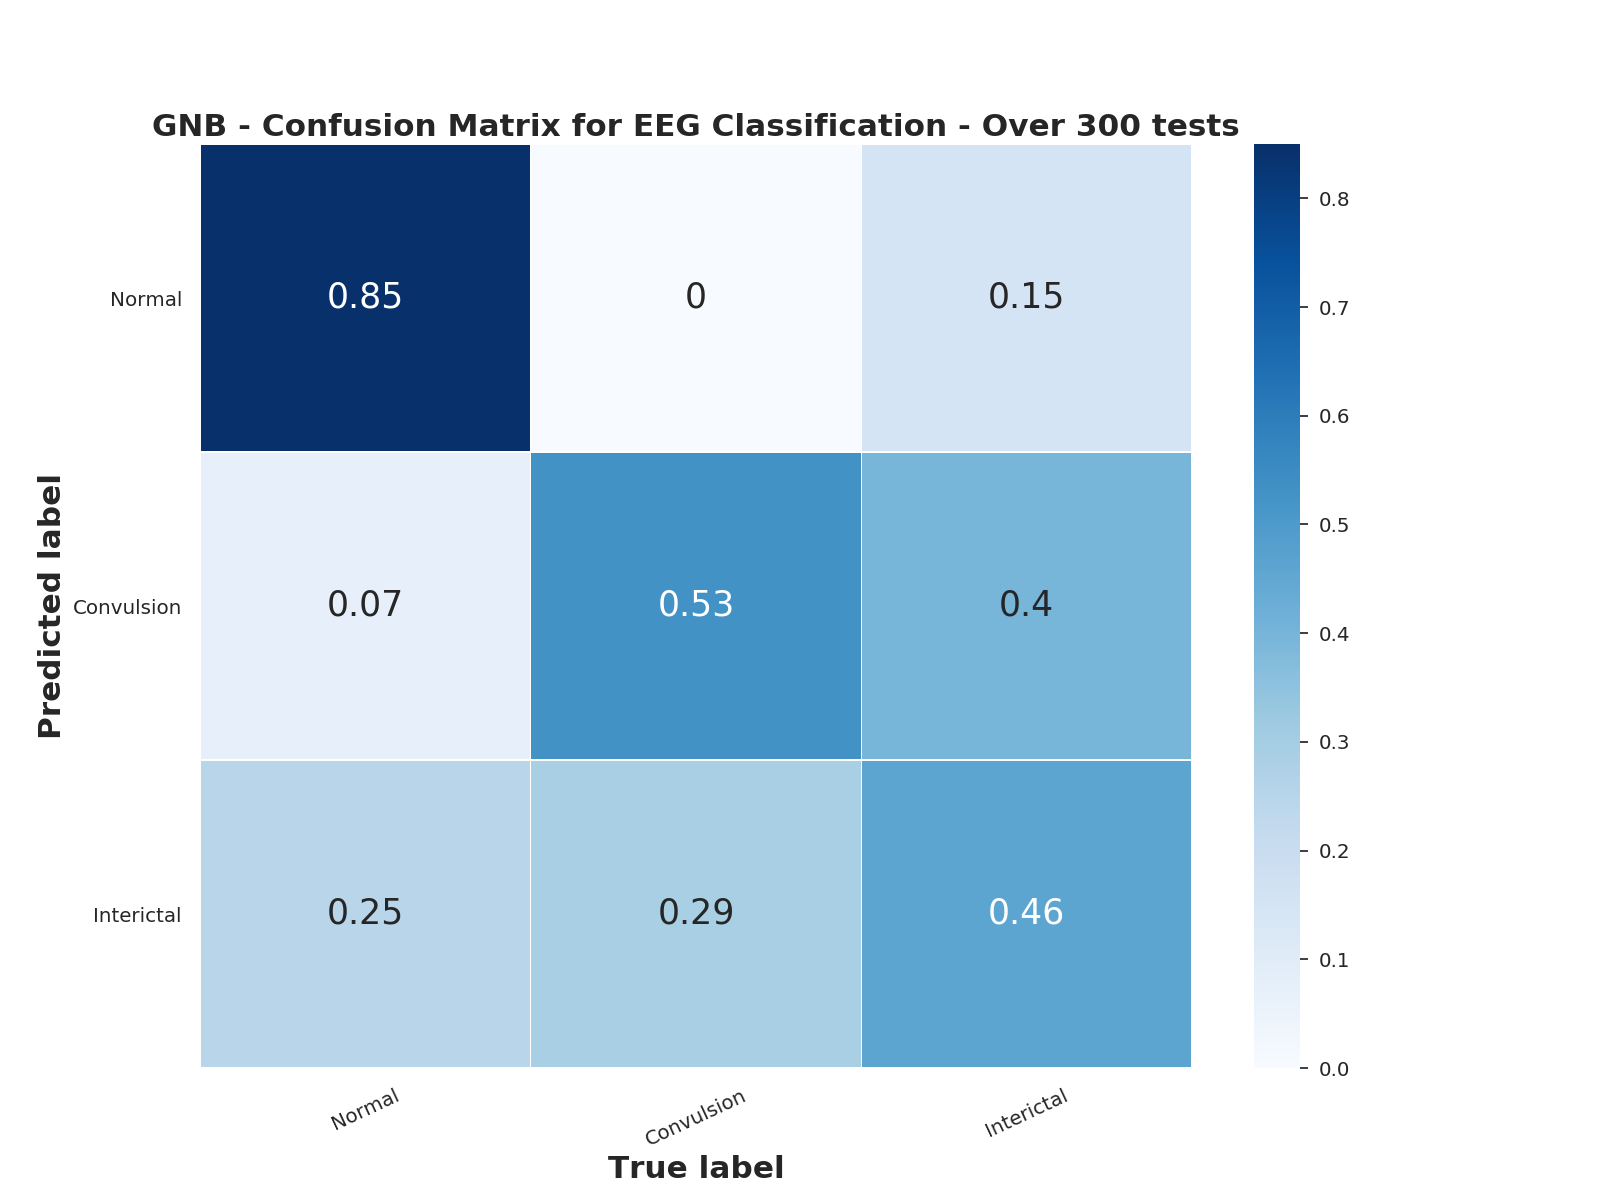

In [34]:
%matplotlib notebook
plot_cm(results['matrix'],results['n_tests'], 'GNB')